<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Data Science and AI

# Capstone Project
### Thomas Waldin - 18/04/2023

# 1 - Problem Definition
Fraudulent transactions result in monetary loss and loss of trust in provider. Can fraudulent transactions be identified by a machine learning model?

# 2 - About the Data
### Credit Card Transactions Fraud Detection Dataset
Simulated Credit Card Transactions generated using Sparkov

About the Dataset
- This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

Source of Simulation
- This was generated using Sparkov Data Generation | Github tool created by Brandon Harris. This simulation was run for the duration - 1 Jan 2019 to 31 Dec 2020. The files were combined and converted into a standard format.
        
Kaggle
- Online community of data scientists and machine learning practitioners
- https://www.kaggle.com/datasets/kartik2112/fraud-detection

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime

from sklearn.decomposition import PCA

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score

from imblearn.over_sampling import RandomOverSampler

from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn.linear_model import SGDOneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor


# 3 - Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [3]:
FILENAME = 'fraudTest.csv'
df = pd.read_csv(FILENAME)

# 4 - Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or spurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [3]:
df.shape

(555719, 23)

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [6]:
for col in df.columns:
    if df[col].dtype != 'float64' and df[col].dtype != 'int64':
        print(f"Column {col} has {len(df[col].unique())} unique categories.")

Column trans_date_trans_time has 544760 unique categories.
Column merchant has 693 unique categories.
Column category has 14 unique categories.
Column first has 341 unique categories.
Column last has 471 unique categories.
Column gender has 2 unique categories.
Column street has 924 unique categories.
Column city has 849 unique categories.
Column state has 50 unique categories.
Column job has 478 unique categories.
Column dob has 910 unique categories.
Column trans_num has 555719 unique categories.


In [7]:
df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

### Splitting the date and time

In [8]:
# Convert the trans_date_trans_time column to datetime format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Create new columns for trans_date and trans_time
df['trans_date'] = df['trans_date_trans_time'].dt.date
df['trans_time'] = df['trans_date_trans_time'].dt.time

### Basic EDA

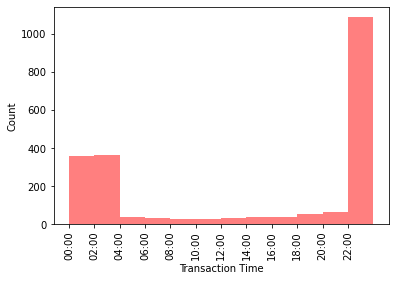

In [120]:
# Convert the 'trans_time' column to the number of seconds since midnight
df['trans_time_seconds'] = df['trans_time'].apply(lambda x: x.hour*3600 + x.minute*60 + x.second)

# Filter the DataFrame to only include fraudulent transactions
df_fraud = df[df['is_fraud'] == 1]

# Plot a histogram of 'trans_time_seconds' for fraudulent transactions
plt.hist(df_fraud['trans_time_seconds'], bins=12, range=(0, 24*3600), alpha=0.5, color='red')
#plt.title("Histogram of Transaction Time for Fraudulent Transactions")
plt.xlabel("Transaction Time")
plt.ylabel("Count")

# Set the x-axis tick labels to display 24-hour time, rotated by 90 degrees and with a step of 2 hours
plt.xticks(range(0, 24*3600, 2*3600), [f"{h:02d}:00" for h in range(0, 24, 2)], rotation=90)

plt.show()

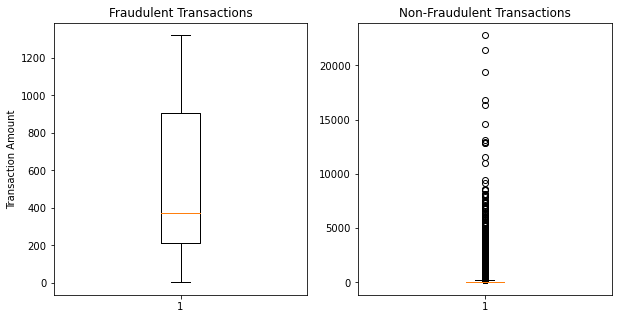

In [10]:
# Filter the DataFrame to only include non-fraudulent transactions
df_non_fraud = df[df['is_fraud'] == 0]

# Plot boxplots of 'amt' for fraudulent and non-fraudulent transactions side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].boxplot(df_fraud['amt'])
ax[0].set_title("Fraudulent Transactions")
ax[0].set_ylabel("Transaction Amount")
ax[1].boxplot(df_non_fraud['amt'])
ax[1].set_title("Non-Fraudulent Transactions")
#ax[1].set_ylabel("Transaction Amount")
plt.show()

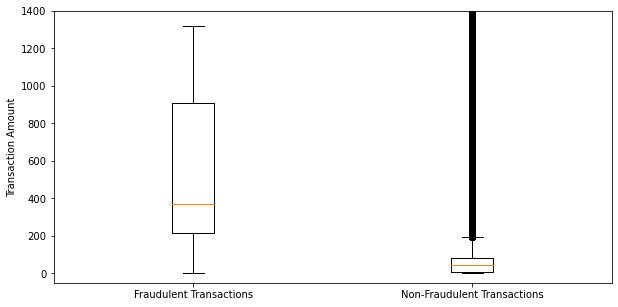

In [11]:
# Plot boxplots of 'amt' for fraudulent and non-fraudulent transactions on the same axis
fig, ax = plt.subplots(figsize=(10, 5))
ax.boxplot([df_fraud['amt'], df_non_fraud['amt']])
ax.set_xticklabels(['Fraudulent Transactions', 'Non-Fraudulent Transactions'])
ax.set_ylabel("Transaction Amount")
ax.set_ylim(top=1400)
ax.set_ylim(bottom=-50)
plt.show()

In [92]:
# convert dob to datetime format
df['dob'] = pd.to_datetime(df['dob'])

# calculate age as of December 2022
current_date = datetime.datetime(2022, 12, 1)
df['age'] = (current_date - df['dob']).astype('<m8[Y]')

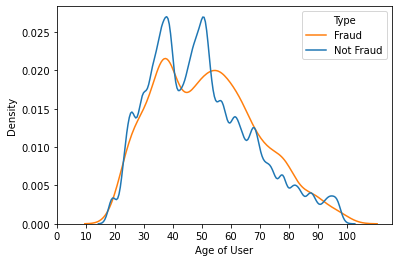

In [122]:
# Age vs Fraud
df['age']=datetime.date.today().year-pd.to_datetime(df['dob']).dt.year
ax=sns.kdeplot(x='age',data=df, hue='is_fraud', common_norm=False)
ax.set_xlabel('Age of User')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,10))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

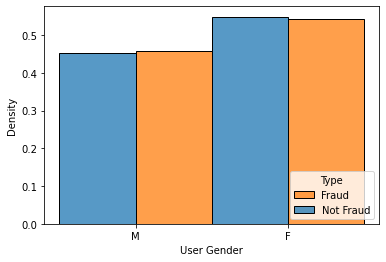

In [4]:
# Gender vs Fraud
ax=sns.histplot(x='gender',data=df, hue='is_fraud',stat='density',multiple='dodge',common_norm=False)
ax.set_ylabel('Density')
ax.set_xlabel('User Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'], loc='lower right')




Text(0, 0.5, 'Transaction Category')

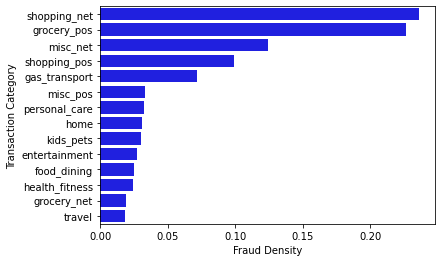

In [129]:
# Fraud by Category
fraud_data = df[df['is_fraud']==1]
fraud_perc_by_category = fraud_data['category'].value_counts(normalize=True).to_frame().reset_index()
fraud_perc_by_category.columns=['category', 'fraud_density']

ax = sns.barplot(y='category', x='fraud_density', data=fraud_perc_by_category.sort_values('fraud_density', ascending=False), color='blue')
ax.set_xlabel('Fraud Density')
ax.set_ylabel('Transaction Category')

# 5 - Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

## Feature Engineering

What can be an anomaly?
- A sudden increase in spending
- Purchase of a large ticket item
- A series of rapid transactions
- Multiple transactions with the same merchant
- Transactions that originate in an unusual location or foreign country
- Transactions that occur at unusual times

https://www.inscribe.ai/fraud-detection/credit-fraud-detection

Features should be generated such that these anomalies can be detected.

- A sudden increase in spending - Amount is covered by 'amt', frequency can be covered by a new time-based feature(s) comparing time of current and prior transactions 
- Purchase of a large ticket item - Covered by 'amt'
- A series of rapid transactions - new time-based feature(s)
- Multiple transactions with the same merchant - new feature comparing current merchant with previous (or multiple)
- Transactions that originate in an unusual location or foreign country - A new feature distinguishing if the new location is unusual. 
- Transactions that occur at unusual times - split the datetime object into two features, date and time so that time can be used. date should probably not be used as a feature in itself.


### Feature to distinguish if time is unusual

In [61]:
# create a new feature 'time_unusual'
df['time_unusual'] = ((df['trans_time_seconds'] >= 79200) | (df['trans_time_seconds'] < 14400)).astype(int)

### Feature to compare time between transactions
A new feature 'interval' that takes the minimum difference in time between the transaction and the one either before or after it

In [12]:
# calculate the time difference between consecutive transactions with the same "cc_num"
df['interval'] = df.groupby('cc_num')['trans_date_trans_time'].diff().dt.total_seconds().fillna(0)

### Feature to record multiple transations with the same merchant in a row
A new feature 'cons_transactions' records the number of repeated transactions with the same merchant

In [13]:
# Create a new column 'cons_merchant' with an integer representing the number of consecutive transactions with the same merchant for each person
df['cons_merchant'] = 0
cc_merchants = {}
for i in range(len(df)):
    cc_num = df.loc[i, 'cc_num']
    merchant = df.loc[i, 'merchant']
    if cc_num not in cc_merchants:
        cc_merchants[cc_num] = {
            'prev_merchant': None,
            'cons_merchant': 1
        }
    elif merchant == cc_merchants[cc_num]['prev_merchant']:
        cc_merchants[cc_num]['cons_merchant'] += 1
    else:
        cc_merchants[cc_num]['cons_merchant'] = 1
    df.loc[i, 'cons_merchant'] = cc_merchants[cc_num]['cons_merchant']
    cc_merchants[cc_num]['prev_merchant'] = merchant
df['cons_merchant'] -= 1

### Feature to distinguish if the location is unusual
Add difference in Latitude and Logitude 'diff_lat' and 'diff_long' between merchant and user

In [14]:
# create diff_lat and diff_long columns
df['diff_lat'] = abs(df['merch_lat'] - df['lat'])
df['diff_long'] = abs(df['merch_long'] - df['long'])

## EDA of new features

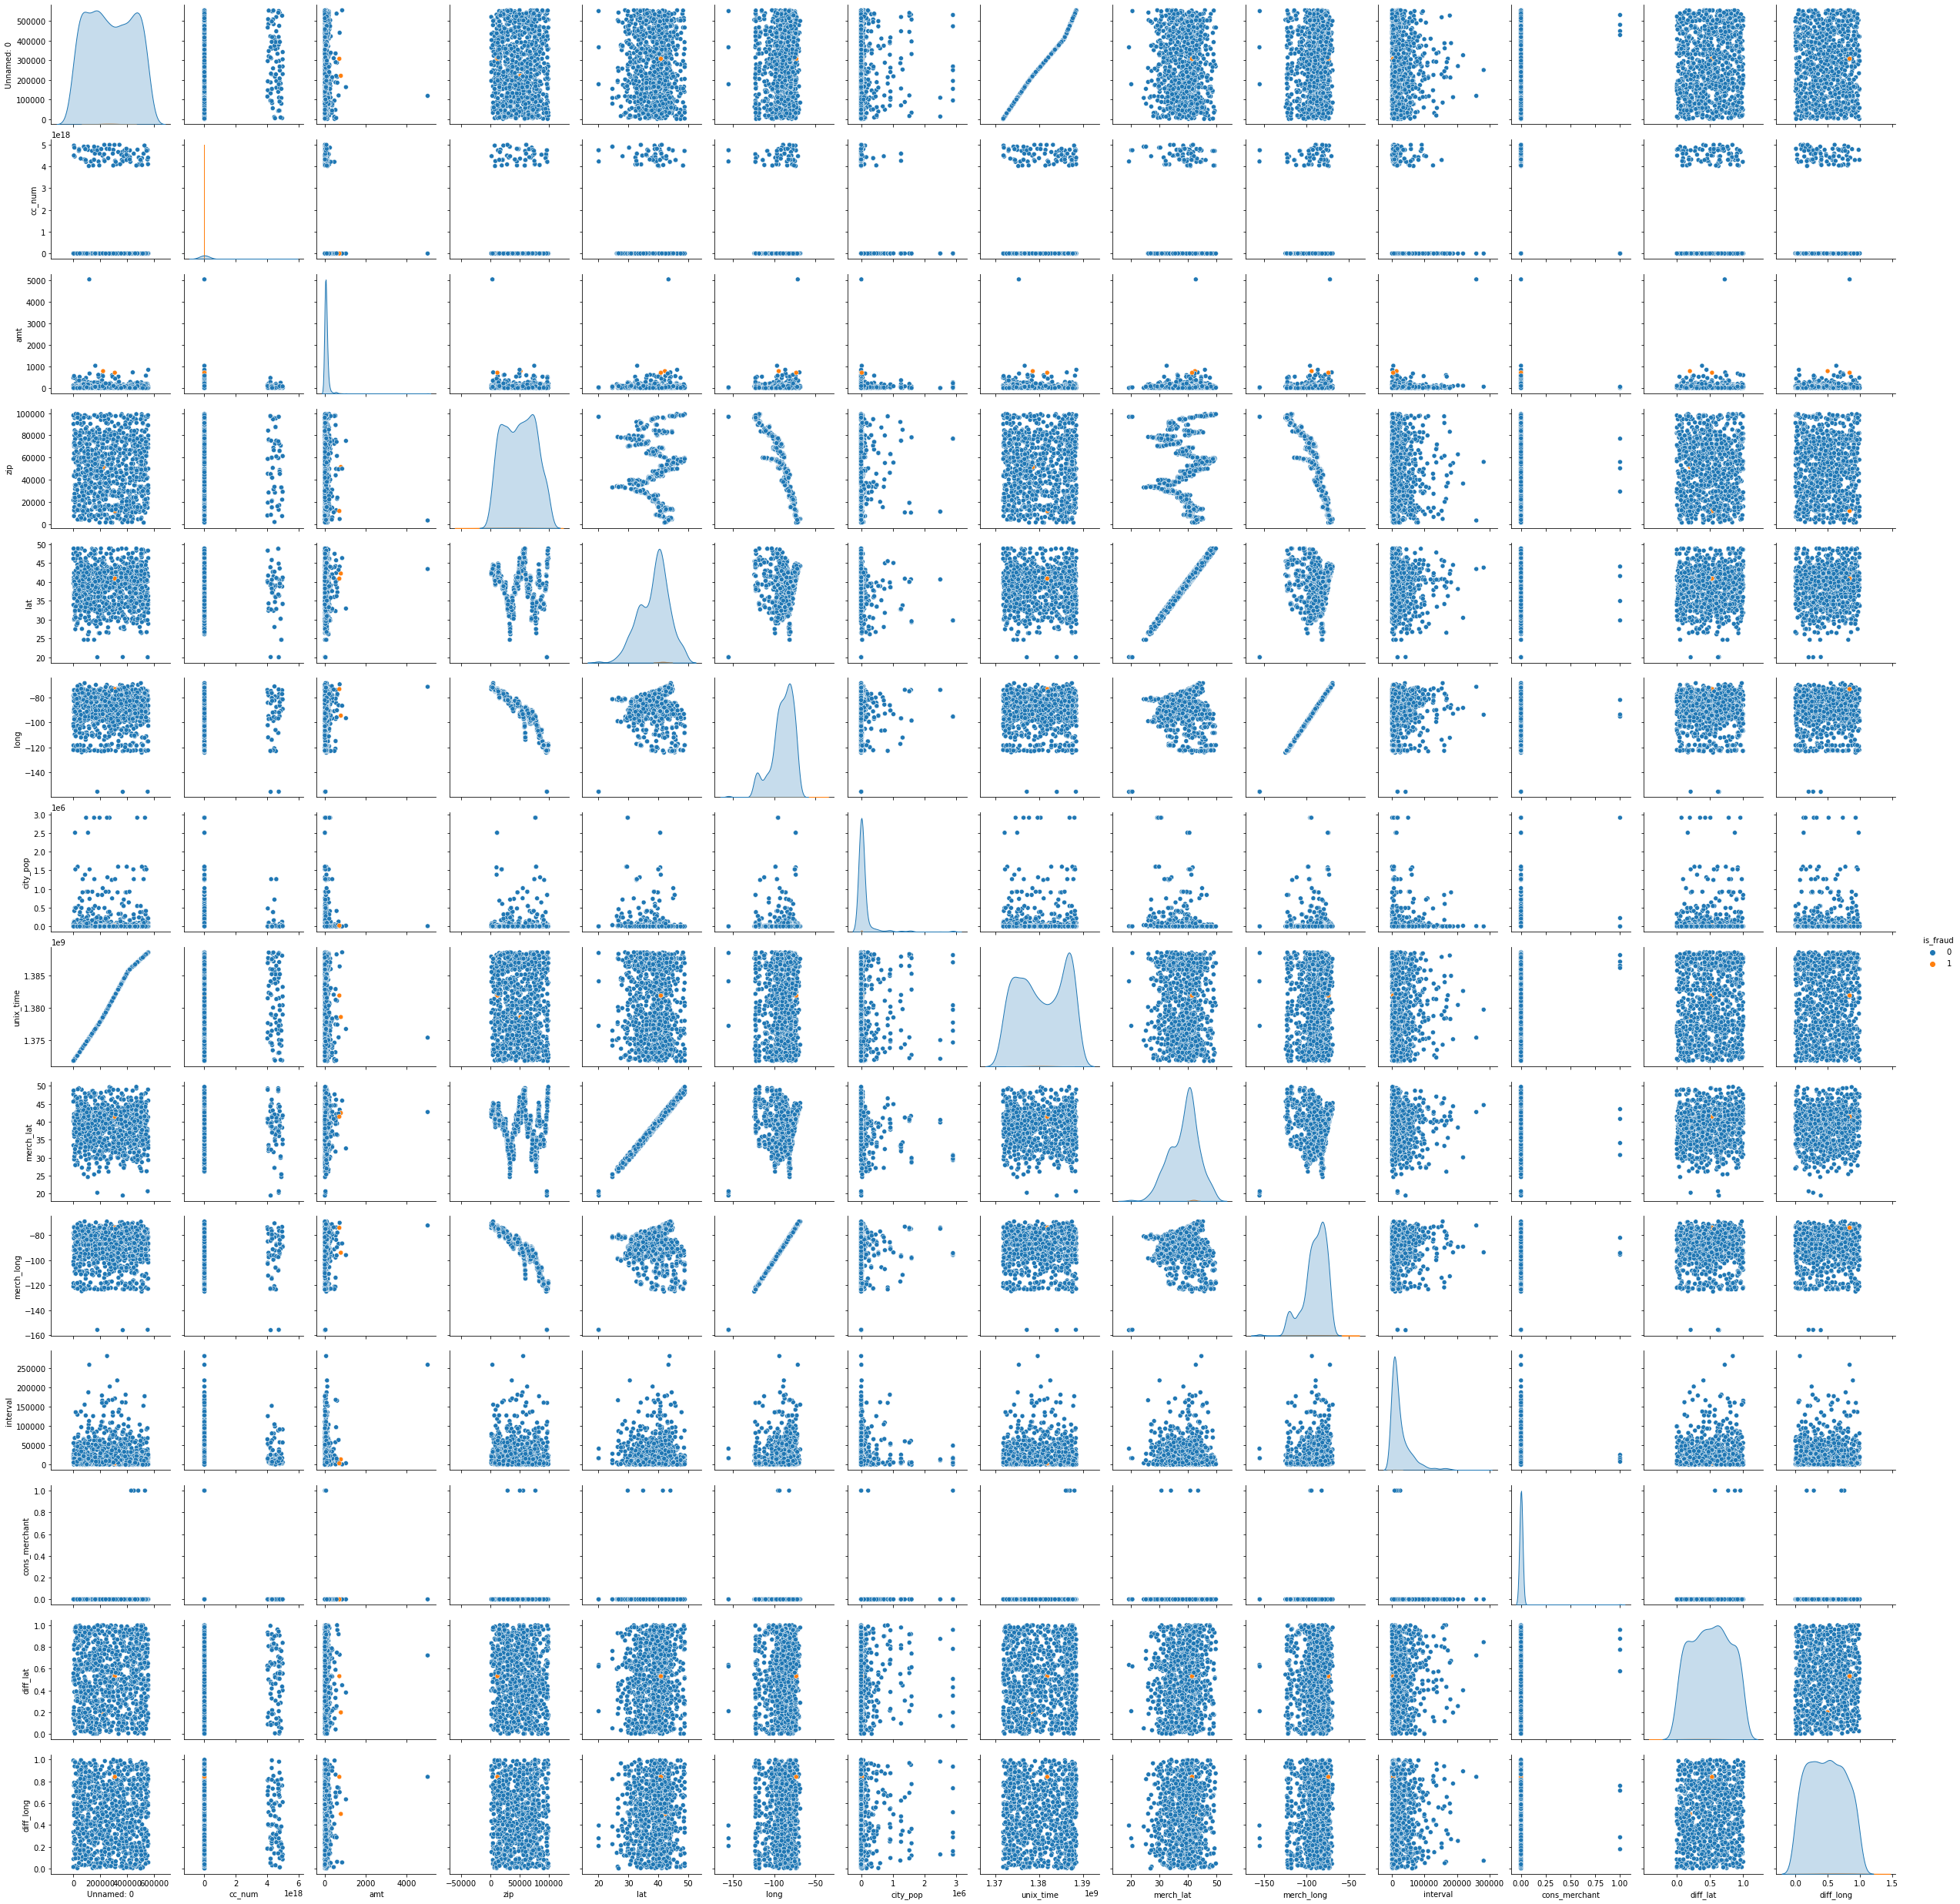

In [11]:
sns.pairplot(data=df.sample(n=1000, random_state=42), hue='is_fraud')

## Scaling Features and Dummy Variables

In [39]:
df.dtypes

Unnamed: 0                        int64
trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                              object
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
trans_date                       object
trans_time                       object


In [93]:
# Define the X and y variables
X = df.drop(['is_fraud', 'Unnamed: 0', 'merchant', 'first', 'last', 'city', 'street', 'trans_date', 'trans_time', 'state', 'trans_date_trans_time', 'gender', 'job', 'trans_num', 'dob'], axis=1)
y = df['is_fraud']

X = pd.get_dummies(X, drop_first=True)

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
X_normalized = scaler.fit_transform(X)

# Convert the numpy array to a pandas DataFrame
Xn = pd.DataFrame(X_normalized, columns=X.columns)

Xn.head()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,trans_time_seconds,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,-0.317252,-0.424463,-0.731091,-0.904377,0.677451,0.816521,-1.703871,-0.894145,0.657586,-0.156770,...,-0.323179,-0.265813,-0.322472,-0.309894,-0.227589,-0.257570,3.623634,-0.285117,-0.313712,-0.180047
1,-0.316273,-0.252337,1.309217,0.351182,-1.472454,-0.292685,-1.703869,0.178126,-1.436610,-0.156444,...,-0.323179,-0.265813,-0.322472,-0.309894,-0.227589,-0.257570,3.623634,-0.285117,-0.313712,-0.180047
2,-0.316254,-0.179353,-1.382695,0.420768,1.216667,-0.178853,-1.703865,0.383257,1.167640,-0.155629,...,-0.323179,3.762040,-0.322472,-0.309894,-0.227589,-0.257570,-0.275966,-0.285117,-0.313712,-0.180047
3,-0.316259,-0.059605,-0.598119,-1.970539,0.685934,-0.111371,-1.703861,-1.909485,0.680717,-0.154733,...,-0.323179,-0.265813,-0.322472,-0.309894,-0.227589,3.882438,-0.275966,-0.285117,-0.313712,-0.180047
4,-0.316308,-0.422358,0.029394,1.128092,0.380004,-0.289942,-1.703861,1.259139,0.316510,-0.154651,...,-0.323179,-0.265813,-0.322472,-0.309894,-0.227589,-0.257570,-0.275966,-0.285117,-0.313712,5.554114


## Feature Selection

In [ ]:
# Create the logistic regression model
logreg = LogisticRegression()

# Create an empty list to store the cross-validation scores
scores = []

# Create an empty list to store the selected features
selected_features = []

# Define the range of number of features to select
n_features_range = range(1, len(Xn.columns) + 1)

# Iterate over different number of features to select
for n_features in n_features_range:
    # Create the SelectKBest object
    feature_selector = SelectKBest(f_classif, k=n_features)
    feature_selector.fit(Xn, y)
    # Get the selected features
    selected_features.append(Xn.columns[feature_selector.get_support()])
    # Calculate the cross-validation score
    score = cross_val_score(logreg, Xn[Xn.columns[feature_selector.get_support()]], y, cv=5).mean()
    scores.append(score)

# Plot the number of features against the cross-validation score
plt.plot(n_features_range, scores)
plt.xlabel('Number of features')
plt.ylabel('Cross-validation score')
plt.show()

# Get the index of the feature with the highest score
best_index = scores.index(max(scores))

# Print the selected features in the order of most useful to least
for feature in selected_features[best_index]:
    print(feature)

print('------')

# Print the features in the order of most useful to least
for feature in selected_features:
    print(feature)

In [95]:
# X selected features
Xs = Xn[['cc_num', 'amt', 'zip', 'lat','city_pop','unix_time','merch_lat','merch_long','trans_time_seconds','interval','time_unusual','age','category_food_dining','category_gas_transport','category_grocery_net',
'category_grocery_pos','category_health_fitness','category_home','category_kids_pets','category_misc_net','category_misc_pos','category_personal_care','category_shopping_net','category_shopping_pos','category_travel']]

# 6 - Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

### Novelty Detection:
The training data is not polluted by outliers and we are interested in detecting whether a new observation is an outlier. In this context an outlier is also called a novelty.

# 7 - Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [96]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=42)

# Split train data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 8 - Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [97]:
# Create an instance of an Elliptic Envelope model and define parameters/hyperparameters
contamination = 0.001
support_fraction = 0.95
EE = EllipticEnvelope(contamination=contamination, support_fraction=support_fraction)

In [106]:
SVM = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)

In [111]:
SGD_SVM = SGDOneClassSVM(learning_rate='optimal')

In [101]:
IF = IsolationForest(contamination=contamination)

# 9 - Fit the Model

In [ ]:
EE.fit(X_train)

In [115]:
SVM.fit(X_train)

OneClassSVM(gamma=0.1, nu=0.1)

In [112]:
SGD_SVM.fit(X_train)

SGDOneClassSVM()

In [102]:
IF.fit(X_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1)

# 10 - Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [99]:
# Make predictions for the train and validation sets
y_pred_train = EE.predict(X_train)
y_pred_val = EE.predict(X_val)

# Evaluate the model on the training data using ROC AUC
auc_train = roc_auc_score(y_train, y_pred_train)
auc_val = roc_auc_score(y_val, y_pred_val)
print(type(EE).__name__, "ROC AUC of training set:", auc_train)
print(type(EE).__name__, "ROC AUC of validation set:", auc_val)
if auc_val > auc_train:
    print('The model is not overfitting')
else:
    print('Warning, the model is overfitting')

EllipticEnvelope ROC AUC of training set: 0.28550975319026684
EllipticEnvelope ROC AUC of validation set: 0.27500602988319756
Warning, the model is overfitting


In [116]:
# Make predictions for the train and validation sets
y_pred_train = SVM.predict(X_train)
y_pred_val = SVM.predict(X_val)

# Evaluate the model on the training data using ROC AUC
auc_train = roc_auc_score(y_train, y_pred_train)
auc_val = roc_auc_score(y_val, y_pred_val)
print(type(SVM).__name__, "ROC AUC of training set:", auc_train)
print(type(SVM).__name__, "ROC AUC of validation set:", auc_val)
if auc_val > auc_train:
    print('The model is not overfitting')
else:
    print('Warning, the model is overfitting')

OneClassSVM ROC AUC of training set: 0.2609827697156454
OneClassSVM ROC AUC of validation set: 0.23967184836946395
Warning, the model is overfitting


In [113]:
# Make predictions for the train and validation sets
y_pred_train = SGD_SVM.predict(X_train)
y_pred_val = SGD_SVM.predict(X_val)

# Evaluate the model on the training data using ROC AUC
auc_train = roc_auc_score(y_train, y_pred_train)
auc_val = roc_auc_score(y_val, y_pred_val)
print(type(SGD_SVM).__name__, "ROC AUC of training set:", auc_train)
print(type(SGD_SVM).__name__, "ROC AUC of validation set:", auc_val)
if auc_val > auc_train:
    print('The model is not overfitting')
else:
    print('Warning, the model is overfitting')

SGDOneClassSVM ROC AUC of training set: 0.5272449142040647
SGDOneClassSVM ROC AUC of validation set: 0.5201834917785062
Warning, the model is overfitting


In [103]:
# Make predictions for the train and validation sets
y_pred_train = IF.predict(X_train)
y_pred_val = IF.predict(X_val)

# Evaluate the model on the training data using ROC AUC
auc_train = roc_auc_score(y_train, y_pred_train)
auc_val = roc_auc_score(y_val, y_pred_val)
print(type(IF).__name__, "ROC AUC of training set:", auc_train)
print(type(IF).__name__, "ROC AUC of validation set:", auc_val)
if auc_val > auc_train:
    print('The model is not overfitting')
else:
    print('Warning, the model is overfitting')

IsolationForest ROC AUC of training set: 0.30462368327402367
IsolationForest ROC AUC of validation set: 0.2969560645680588
Warning, the model is overfitting


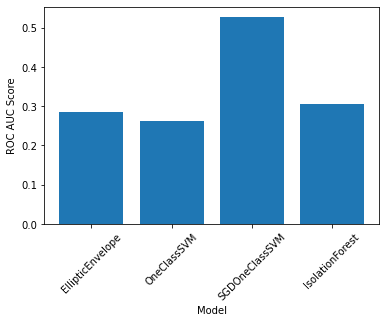

In [135]:
# Define the AUC scores
auc_scores = [0.28550975319026684, 0.2609827697156454, 0.5272449142040647, 0.30462368327402367]

# Define the model names
model_names = ['EllipticEnvelope', 'OneClassSVM', 'SGDOneClassSVM', 'IsolationForest']

# Create the bar graph
plt.bar(model_names, auc_scores)
plt.xlabel('Model')
plt.ylabel('ROC AUC Score')
plt.xticks(rotation=45)
#lt.title('AUC Scores for Anomaly Detection Models')
plt.show()

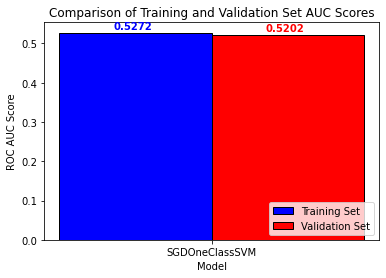

In [141]:
# Define the AUC scores
train_auc = 0.5272449142040647
val_auc = 0.5201834917785062

# Define the model names
model_names = ['SGDOneClassSVM']

# Define the bar widths
bar_width = 0.35

# Define the x positions of the bars
r1 = [0]

# Create the bar graph
plt.bar(r1, [train_auc], width=bar_width, color='blue', edgecolor='black', label='Training Set')
plt.bar([i + bar_width for i in r1], [val_auc], width=bar_width, color='red', edgecolor='black', label='Validation Set')

# Add the AUC scores on the bars
plt.text(r1[0]-0.05, train_auc+0.01, str(round(train_auc, 4)), color='blue', fontweight='bold')
plt.text(r1[0]+bar_width-0.05, val_auc+0.01, str(round(val_auc, 4)), color='red', fontweight='bold')

plt.xlabel('Model')
plt.ylabel('ROC AUC Score')
plt.title('Comparison of Training and Validation Set AUC Scores')
plt.xticks([r + bar_width/2 for r in r1], model_names)
plt.legend(loc='lower right')
plt.show()


# 11 - Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

Test set is imbalanced as it would be in a real life situation, ie detecting fraud from live transaction data.

SGDOneClassSVM ROC AUC: 0.5287629233001758


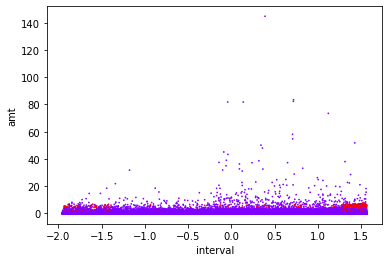

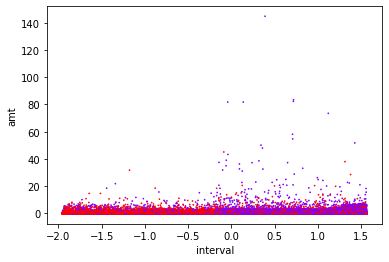

In [143]:
# Analysis of best performer

# Make predictions for y
y_pred = SGD_SVM.predict(X_test)
    
# Evaluate the model using ROC AUC
auc = roc_auc_score(y_test, y_pred)
print(type(SGD_SVM).__name__, "ROC AUC:", auc)
    
# Plot XXXX vs. XXXX with hue indicating if a transaction is fraudulent
plt.scatter(X_test['trans_time_seconds'], X_test['amt'], c=y_test, cmap='rainbow', s=0.5)
plt.xlabel('interval')
plt.ylabel('amt')
#plt.title('amt vs. lat with hue indicating if a transaction is fraudulent')
plt.show()

# Plot XXXX vs. XXXX with hue indicating if the data point is predicted as an outlier
plt.scatter(X_test['trans_time_seconds'], X_test['amt'], c=y_pred, cmap='rainbow', s=0.5)
plt.xlabel('interval')
plt.ylabel('amt')
#plt.title('amt vs. lat with hue indicating if the data point is predicted as an outlier')
plt.show()

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

Model is not effective enough for real world application. Performance increases will likely be found in feature engineering and feature selection.



---



---



> > > > > > > > > © 2023 Institute of Data


---



---





## Redundant Code Blocks

In [ ]:
import pandas as pd

# Create a sample dataframe
df = pd.DataFrame({
    'merchant': ['A', 'A', 'C', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'A', 'A'],
    'cc_num': [1111, 1111, 1111, 2222, 2222, 2222, 3333, 3333, 3333, 3333, 1111, 1111]
})

# Create a new column 'cons_merchant' with an integer representing the number of consecutive transactions with the same merchant for each person
df['cons_merchant'] = 0
cc_merchants = {}
for i in range(len(df)):
    cc_num = df.loc[i, 'cc_num']
    merchant = df.loc[i, 'merchant']
    if cc_num not in cc_merchants:
        cc_merchants[cc_num] = {
            'prev_merchant': None,
            'cons_merchant': 1
        }
    elif merchant == cc_merchants[cc_num]['prev_merchant']:
        cc_merchants[cc_num]['cons_merchant'] += 1
    else:
        cc_merchants[cc_num]['cons_merchant'] = 1
    df.loc[i, 'cons_merchant'] = cc_merchants[cc_num]['cons_merchant']
    cc_merchants[cc_num]['prev_merchant'] = merchant
df['cons_merchant'] -= 1

# Print the updated dataframe
print(df)

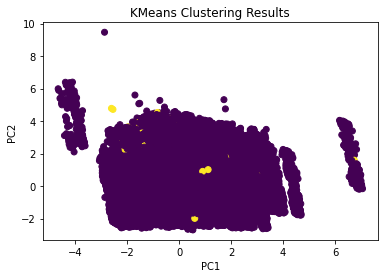

Variance explained by the first 2 principal components: 15.97%


In [105]:
# Perform PCA with n_components=2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

# Create scatter plot of the first 2 principal components with color-coded clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_test)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clustering Results')
plt.show()

# Check how much variance is explained by the first 2 principal components
print("Variance explained by the first 2 principal components: {:.2f}%".format(sum(pca.explained_variance_ratio_) * 100))

In [ ]:

# Create a list of outlier detection models to try
models = [EllipticEnvelope(contamination=0.1),
          OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1),
          SGDOneClassSVM(learning_rate='optimal'),
          IsolationForest(contamination=0.1),
          LocalOutlierFactor(n_neighbors=20, contamination=0.1)]

# Fit each model and generate predictions
for i, model in enumerate(models):
    plt.subplot(1, 5, i+1)
    plt.title(type(model).__name__)
    model.fit(X)
    y_pred = model.predict(X)
    
    # Evaluate the model using ROC AUC
    auc = roc_auc_score(y, y_pred)
    print(type(model).__name__, "ROC AUC:", auc)
    
    # Plot the results
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.xticks(())
    plt.yticks(())

plt.show()

In [ ]:
# Predict the classes of the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)


# Predict probabilities for test set
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", auc)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()